## Experiment 1 (DQN):

In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import argparse
import os

def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Y.append(v.simple_value)
    return X, Y

%matplotlib inline

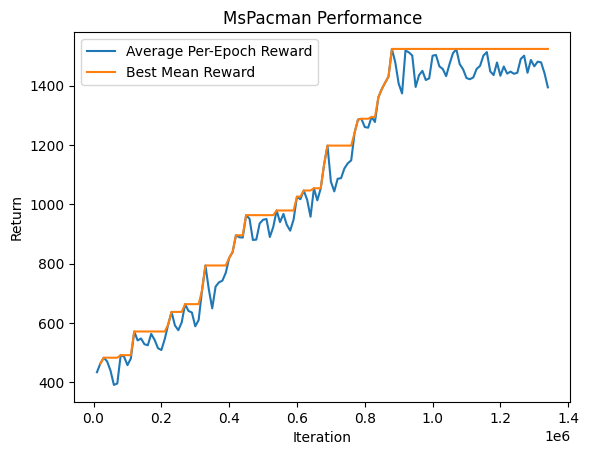

In [35]:
rename = {"sb": "Small Batch", "lb": "Large Batch", "InvertedPendulum": "Inverted Pendulum"}

def gen_plot(file_prefix, best=False, splice=None, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Train_AverageReturn'))
        i = file[file.index("q") + 1]
        lbl1 = file.split(f"q{i}_")[1]
        lbl2 = lbl1.split("-v")[0]
        lbl = lbl2
        if splice:
            lbl = lbl[:lbl.index(splice)]
        
        if best:
            plt.plot(step_nums, np.array(vals), label="Average Per-Epoch Reward")
        else:
            plt.plot(step_nums, np.array(vals), label=lbl)
        
        if best:
            arg2 = "Train_BestReturn"
            times2, step_nums2, vals2 = zip(*event_acc.Scalars(arg2))
            plt.plot(step_nums2, np.array(vals2), label="best mean reward".title())

        plt.legend()
        ttl1 = file.split("-v")[0][1:].split("_")[-1].split(".")[0]
        ttl1 = rename.get(ttl1, ttl1)
        ttl2 = lbl
        ttl2 = rename.get(ttl2, ttl2)
        # print(ttl1, ttl2)
        if ttl1 != ttl2: ttl1 += f" ({ttl2})"
        if '(' in ttl1:
            ttl1 = ttl1[:ttl1.index('(')-1]
    if best:
        plt.title(f"{ttl1} Performance")
    else:
        plt.title(ttl1)
    plt.xlabel('Iteration')
    plt.ylabel('Return')
    plt.show()

gen_plot("q1_M", best=True)

## Q2:

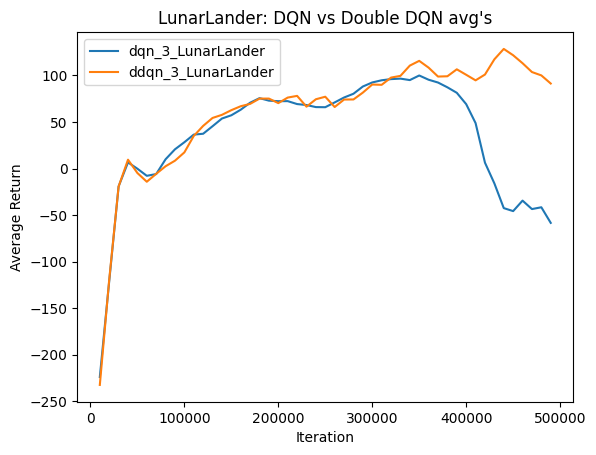

In [32]:
title = "DQN vs Double DQN avg's"
rename = {"sb": "Small Batch", "lb": "Large Batch", "InvertedPendulum": "Inverted Pendulum"}

def gen_plot2(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    # file = ""
    # step_nums = None
    dqn = []
    ddqn = []
    for file in files:
        # print(file)
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Train_AverageReturn'))
        if "double" in file:
            ddqn.append(vals)
        else:
            dqn.append(vals)

    dqn = np.array(dqn)
    dqn = np.mean(dqn, axis=0)
    ddqn = np.array(ddqn)
    ddqn = np.mean(ddqn, axis=0)

    i = file[file.index("q") + 1]
    lbl1 = file.split(f"q{i}_")[1]
    lbl2 = lbl1.split("-v")[0]
    lbl = lbl2
    plt.plot(step_nums, dqn, label=lbl)
    plt.plot(step_nums, ddqn, label='d'+lbl)
    plt.legend()
    ttl1 = file.split("-v")[0][1:].split("_")[-1].split(".")[0]
    ttl1 = rename.get(ttl1, ttl1)
    ttl2 = lbl
    ttl2 = rename.get(ttl2, ttl2)
    # print(ttl1, ttl2)
    if ttl1 != ttl2: ttl1 += f" ({ttl2})"
    ttl1 = ttl1[:ttl1.index('(')-1]
    plt.title(ttl1+': '+title)
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot2("q2")

## Q3:

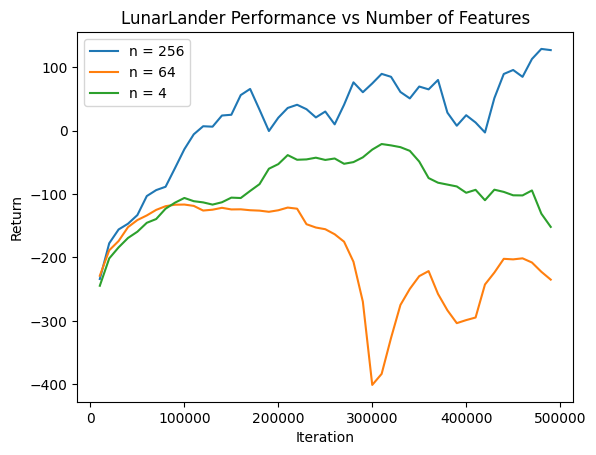

In [41]:
rename3 = {f"hparam{i}_LunarLander":"n = "+["256", "64", "4"][i-1] for i in range(1, 4)}

def gen_plot3(file_prefix="q3", best=False, splice=None, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Train_AverageReturn'))
        i = file[file.index("q") + 1]
        lbl1 = file.split(f"q{i}_")[1]
        lbl2 = lbl1.split("-v")[0]
        lbl = lbl2
        if splice:
            lbl = lbl[:lbl.index(splice)]
        
        if best:
            plt.plot(step_nums, np.array(vals), label="Average Per-Epoch Reward")
        else:
            plt.plot(step_nums, np.array(vals), label=rename3[lbl])
        
        if best:
            arg2 = "Train_BestReturn"
            times2, step_nums2, vals2 = zip(*event_acc.Scalars(arg2))
            plt.plot(step_nums2, np.array(vals2), label="best mean reward".title())

        plt.legend()
        ttl1 = file.split("-v")[0][1:].split("_")[-1].split(".")[0]
        ttl1 = rename.get(ttl1, ttl1)
        ttl2 = lbl
        ttl2 = rename.get(ttl2, ttl2)
        # print(ttl1, ttl2)
        if ttl1 != ttl2: ttl1 += f" ({ttl2})"
        if '(' in ttl1:
            ttl1 = ttl1[:ttl1.index('(')-1]
    plt.title(f"{ttl1} Performance vs Number of Features")
    plt.xlabel('Iteration')
    plt.ylabel('Return')
    plt.show()

gen_plot3()

## Q4

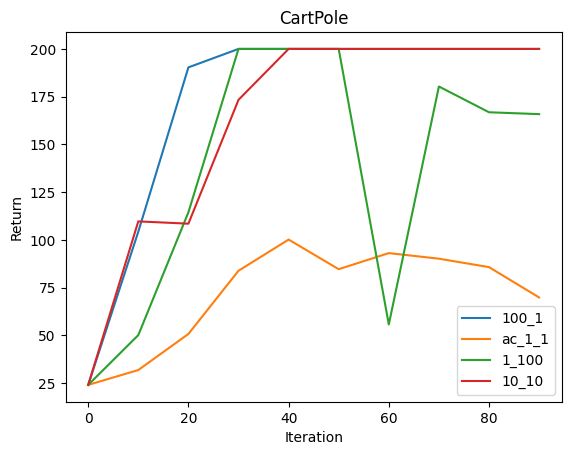

In [36]:
gen_plot("q4_", splice="_CartPole")

## Q5:

```py
python cs285/scripts/run_hw3_actor_critic.py --env_name InvertedPendulum-v4 --ep_len 1000 --discount 0.95 -n 100 -l 2 -s 64 -b 5000 -lr 0.01 --exp_name q5_100_1 -ntu 100 -ngsptu 1
```
or
```py
python cs285/scripts/run_hw3_actor_critic.py --env_name InvertedPendulum-v4 --ep_len 1000 --discount 0.95 -n 100 -l 2 -s 64 -b 5000 -lr 0.01 --exp_name q5_10_10 -ntu 10 -ngsptu 10
```
    
```py
python cs285/scripts/run_hw3_actor_critic.py --env_name HalfCheetah-v4 --ep_len 150 --discount 0.90 --scalar_log_freq 1 -n 150 -l 2 -s 32 -b 30000 -eb 1500 -lr 0.02 --exp_name q5_100_1 -ntu 100 -ngsptu 1
```
or
```py
python cs285/scripts/run_hw3_actor_critic.py --env_name HalfCheetah-v4 --ep_len 150 --discount 0.90 --scalar_log_freq 1 -n 150 -l 2 -s 32 -b 30000 -eb 1500 -lr 0.02 --exp_name q5_10_10 -ntu 10 -ngsptu 10
```

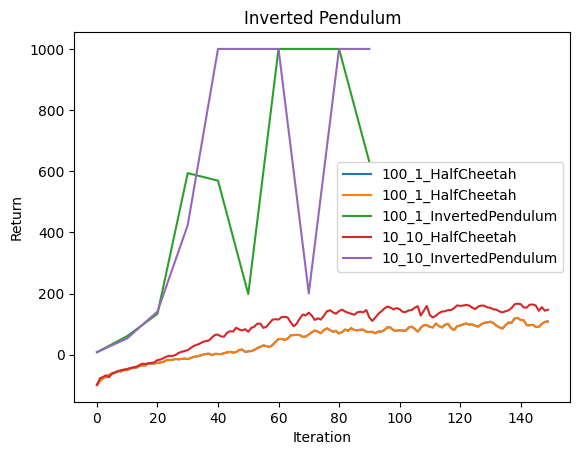

In [45]:
title = "DQN vs Double DQN avg's"
rename = {"sb": "Small Batch", "lb": "Large Batch", "InvertedPendulum": "Inverted Pendulum"}

def gen_plot5(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    # file = ""
    # step_nums = None
    dqn = []
    ddqn = []
    for file in files:
        # print(file)
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Train_AverageReturn'))
        if "double" in file:
            ddqn.append(vals)
        else:
            dqn.append(vals)

    dqn = np.array(dqn)
    dqn = np.mean(dqn, axis=0)
    ddqn = np.array(ddqn)
    ddqn = np.mean(ddqn, axis=0)

    i = file[file.index("q") + 1]
    lbl1 = file.split(f"q{i}_")[1]
    lbl2 = lbl1.split("-v")[0]
    lbl = lbl2
    plt.plot(step_nums, dqn, label=lbl)
    plt.plot(step_nums, ddqn, label='d'+lbl)
    plt.legend()
    ttl1 = file.split("-v")[0][1:].split("_")[-1].split(".")[0]
    ttl1 = rename.get(ttl1, ttl1)
    ttl2 = lbl
    ttl2 = rename.get(ttl2, ttl2)
    # print(ttl1, ttl2)
    if ttl1 != ttl2: ttl1 += f" ({ttl2})"
    ttl1 = ttl1[:ttl1.index('(')-1]
    plt.title(ttl1+': '+title)
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot5("q2")

gen_plot5("q5_")

## Q6:

```py
python cs285/scripts/run_hw3_sac.py \
    --env_name InvertedPendulum-v4 --ep_len 1000 \
    --discount 0.99 --scalar_log_freq 1000 \
    -n 100000 -l 2 -s 256 -b 1000 -eb 2000 \
    -lr 0.0003 --init_temperature 0.1 ----exp_name q6a_sac_InvertedPendulum \
    --seed 1

```

```py
python cs285/scripts/run_hw3_sac.py \
    --env_name HalfCheetah-v4 --ep_len 150 \
    --discount 0.99 --scalar_log_freq 1500 \
    -n 2000000 -l 2 -s 256 -b 1500 -eb 1500 \
    -lr 0.0003 --init_temperature 0.1 --exp_name q6b_sac_HalfCheetah_ \
    --seed 1

```

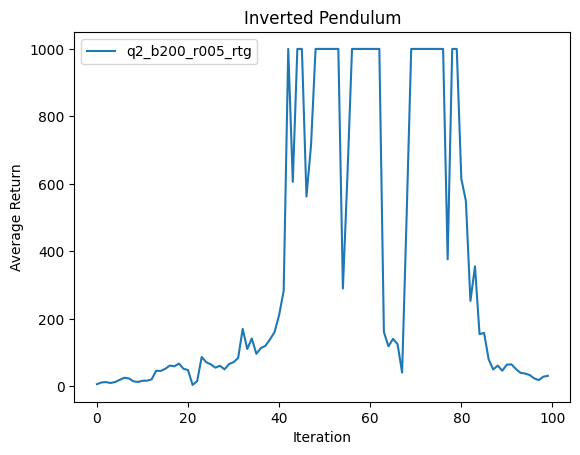

In [24]:
def gen_plot_ip(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q2_pg_")[1].split("_dsa_InvertedPendulum-v4")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("Inverted Pendulum")
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_ip("q2_pg_q2_b200_r005_rtg_dsa_InvertedPendulum-v4_27-09-2022_17-02-04")

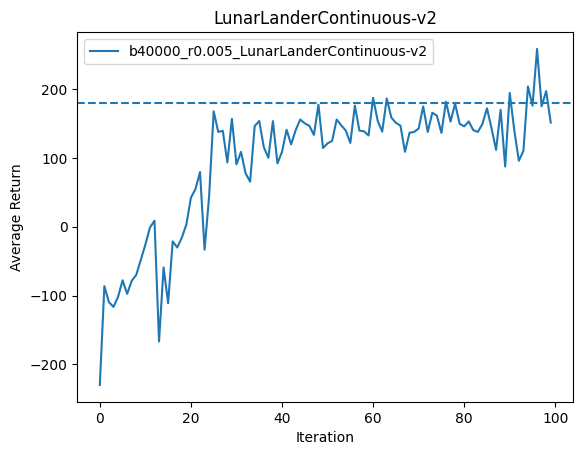

In [30]:
def gen_plot_lunar(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q3_")[1].split("_27")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("LunarLanderContinuous-v2")
    plt.axhline(180, linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_lunar("q2_pg_q3")

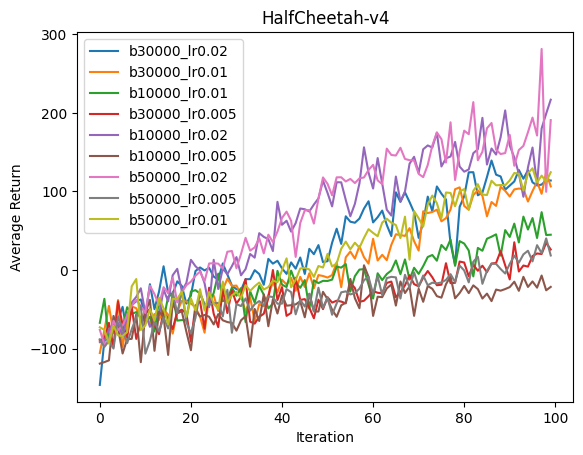

In [34]:
def gen_plot_cheetah(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q4_search_")[1].split("_rtg")[0]#.split("_27")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("HalfCheetah-v4")
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_cheetah("q2_pg_q4")

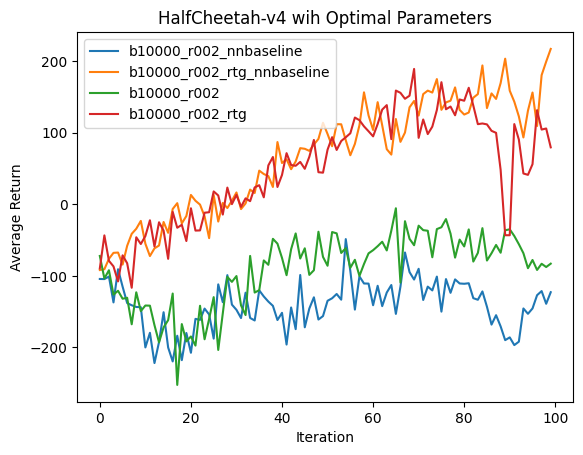

In [37]:
def gen_plot_cheetah_best(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q4_")[1].split("_HalfCheetah")[0]#.split("_27")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("HalfCheetah-v4 wih Optimal Parameters")
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_cheetah_best("q2_pg_q4_b")

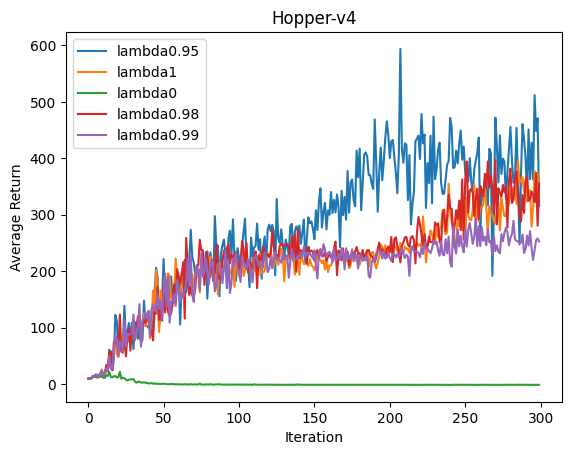

In [38]:
def gen_plot_gae(file_prefix, _DEBUG=False):
    files = glob.glob(f"../../data/{file_prefix}*")
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split(".001_")[1].split("_Hopper-v4")[0]#.split("_27")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        plt.title("Hopper-v4")
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_gae("q2_pg_q5")